# 1ra parte - Modelos supervisados

En esta primera parte se aplicó los modelos naive bayes, arboles de decisión, random forest y redes neuronales con el fin de determinar cual de estos modelos supervisados tiene mejores estimaciones para establecer si una persona es obesa teniendo en cuenta sus hábitos alimenticios y su condición física. 

En esta ocasión se empleó la base de datos de “Estimation of Obesity Levels Based On Eating Habits and Physical Condition” de la UC Irvine Machine Learning Repository, la cual incluye información sobre la estimación de los niveles de obesidad en personas en los países de México, Perú y Colombia con base a sus hábitos y condición física. Esta base está compuesta por 2111 registros y por 17 variables las cuales se describen mediante la siguiente tabla:


In [200]:
from ucimlrepo import fetch_ucirepo
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables

,name,role,type,demographic,description,units,missing_values
0,Gender,Feature,Categorical,Gender,None,None,no
1,Age,Feature,Continuous,Age,None,None,no
2,Height,Feature,Continuous,None,None,None,no
3,Weight,Feature,Continuous,None,None,None,no
4,family_history_with_overweight,Feature,Binary,None,Has a family member suffered or suffers from o...,None,no
5,FAVC,Feature,Binary,None,Do you eat high caloric food frequently?,None,no
6,FCVC,Feature,Integer,None,Do you usually eat vegetables in your meals?,None,no
7,NCP,Feature,Continuous,None,How many main meals do you have daily?,None,no
8,CAEC,Feature,Categorical,None,Do you eat any food between meals?,None,no
9,SMOKE,Feature,Binary,None,Do you smoke?,None,no


Cabe resaltar que, para fines del ejercicio se excluyeron las variables Height y Weight debido a que tienen una alta correlación con la obesidad como se muestra en el índice de masa corporal (IMC) el cual es una medida de la obesidad que se determina por estas dos variables.

# Preparación de los datos

Se empieza a realizar la importación de las librerias necesarias para el ejercicio

In [201]:
# importar librerias para el proyecto
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model, tree
from sklearn.feature_selection import RFE
from sklearn import linear_model, tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from dtreeviz.trees import dtreeviz
from sklearn.model_selection import GridSearchCV
import joblib as joblib
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
import keras.backend as K
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, f1_score, accuracy_score, recall_score
from tabulate import tabulate
#from keras.wrappers.scikit_learn import KerasRegressor
#from scikeras.wrappers import KerasClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


In [202]:
# Cargamos los datos  
datos = pd.read_csv("../Datos/ObesityDataSet_raw_and_data_sinthetic.csv")
datos.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [203]:
datos.describe()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


A continuación, se realizó la separición de las variables categoricas y númericas en conjunto de la separación de la base en testeo y train. Adicionalmente para la variable objetivo "NObeyesdad" se nombraron sus 7 categorias en números del 0 al 6 para llevar a cabo el ejercicio.

In [204]:
rng = np.random.RandomState(seed=30) # Algo pasa con la semilla pero en X_train la variable CAEC queda sin always, por eso al ajustar el modelo no encuentra la categoría
categorical= ["Gender","family_history_with_overweight", "FAVC","SMOKE", "SCC","CAEC","CALC",'MTRANS']
numerical_columns = ["Age", "FCVC", "NCP", "CH2O", "FAF","TUE"]
X = datos[numerical_columns +categorical]
y = datos["NObeyesdad"]
y = pd.DataFrame(datos['NObeyesdad'].map({'Normal_Weight': 0, 'Insufficient_Weight': 1, 'Overweight_Level_I':2,'Overweight_Level_II':3, 'Obesity_Type_I':4,'Obesity_Type_II':5, 'Obesity_Type_III':6}))
yname = ["NObeyesdad"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=54)

## Preprocessing


Se aplicó la función de ColumnTransformer para llevar a cabo la transformación de los datos. En el caso de las variables categóricas, se empleó la función OneHotEncoder para su conversión a formato numérico. En cuanto a las variables numéricas, se llevó a cabo la escalación utilizando la función StandardScaler.

In [205]:
categorical_encoder = OneHotEncoder(handle_unknown='ignore') 
numerical_pipe = StandardScaler()

preprocessing = ColumnTransformer(
    [
        ("codificacion de categoricas",categorical_encoder, categorical),
        ("Transformación de numéricas", numerical_pipe, numerical_columns)
    ],
    verbose_feature_names_out=False,
)


A continuación, se realiza la estimación de los modelos supervisados y se eligira cual es el mejor para deteminar si los individuos son obesos.

# Logistic Model

Se implementó el modelo logístico mediante las funciones Pipeline y GridSearchCV con el objetivo de generar múltiples modelos logísticos y seleccionar el que obtenga el mejor rendimiento en términos de precisión (accuracy).

In [206]:
logit = LogisticRegression(random_state=30)
modelo_logit = Pipeline(
    [
    ("preprocesamiento", preprocessing),
    ("Classifier", logit),  
    ]
)

In [207]:
k_fold = StratifiedKFold(5, shuffle=True, random_state=30)
param_grid = {'Classifier__penalty': ['l1', 'l2'],           # Tipo de penalización
              'Classifier__C': [0.001, 0.01, 0.1, 1, 10],    # Parámetro de regularización inversa (más pequeño es más fuerte)
              'Classifier__max_iter': [100, 200, 300],        # Número máximo de iteraciones
              'Classifier__fit_intercept': [True, False],     # Ajustar o no la intercepción
              'Classifier__class_weight': [None, 'balanced'] } # Manejo de clases desbalanceadas}

best_log = GridSearchCV(modelo_logit, param_grid, cv=5, scoring='accuracy')
best_log.fit(X_train, y_train)

c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-v

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocesamiento',
                                        ColumnTransformer(transformers=[('codificacion '
                                                                         'de '
                                                                         'categoricas',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Gender',
                                                                          'family_history_with_overweight',
                                                                          'FAVC',
                                                                          'SMOKE',
                                                                          'SCC',
                                                                          'CAEC',
                                                                          'CALC',
                                                                          'MTRANS']),
                                                                        ('Transformación '
                                                                         'de '
                                                                         'numéricas',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'FCVC',
                                                                          'NCP',
                                                                          'CH2O',
                                                                          'FAF',
                                                                          'TUE'])],
                                                          verbose_feature_names_out=False)),
                                       ('Classifier',
                                        LogisticRegression(random_state=30))]),
             param_grid={'Classifier__C': [0.001, 0.01, 0.1, 1, 10],
                         'Classifier__class_weight': [None, 'balanced'],
                         'Classifier__fit_intercept': [True, False],
                         'Classifier__max_iter': [100, 200, 300],
                         'Classifier__penalty': ['l1', 'l2']},
             scoring='accuracy')

Dentro de los diferentes modelos lógicticos creados, se eligio el mejor modelo con un accurency de  0.6420 con datos de testeo y de 0.6134 con datos de entrenamiento. Además, presentó un área bajo la curva (AUC) con enfoque de "weighted" de 0.8764, bajo las siguientes especificaciones:

- 'Classifier__C': 10: Un valor más alto de C indica una regularización más débil, lo que significa que el modelo puede ajustarse más a los datos de entrenamiento. En este caso es una regularización relativamente débil.

- 'Classifier__class_weight': 'balanced': Las clases menos representadas tendrán un peso mayor para equilibrar el impacto de las clases más frecuentes durante el entrenamiento del modelo.

- 'Classifier__fit_intercept': True: Se permite que el modelo tenga un término de intercepción.

- 'Classifier__max_iter': 300: Representa el número máximo de iteraciones permitidas durante la optimización del modelo.

- 'Classifier__penalty': 'l2': Este parámetro especifica el tipo de regularización que se aplica al modelo. En este caso, 'l2' se refiere a la regularización de norma L2, que penaliza los coeficientes cuadrados grandes en la función de pérdida.


In [208]:
best_log.best_params_

{'Classifier__C': 10,
 'Classifier__class_weight': 'balanced',
 'Classifier__fit_intercept': True,
 'Classifier__max_iter': 300,
 'Classifier__penalty': 'l2'}

En total, se estima que del total de individuos mal clasificados (189), 57 son falsos negativos y 132 son falsos positivos, lo que resulta en una sensibilidad del 0.6420 y una precisión del 0.6323.

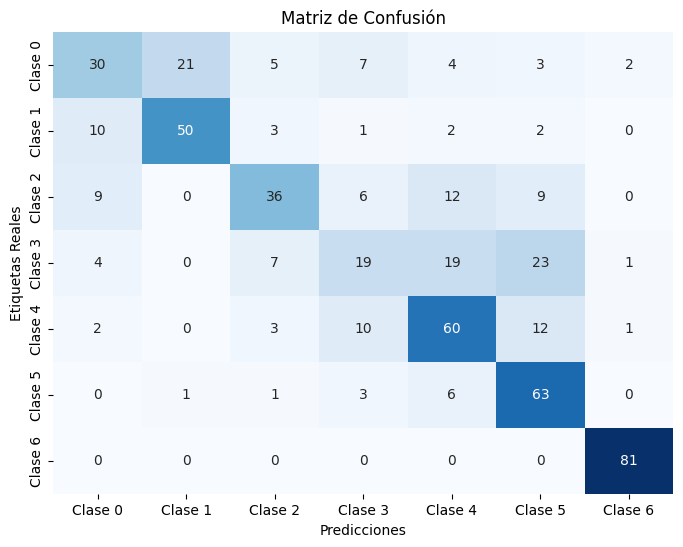

In [209]:
from sklearn.metrics import confusion_matrix

y_test1= pd.DataFrame(y_test)
y_predlog = best_log.predict(X_test)
cm = confusion_matrix(y_test1, y_predlog)
# Configuración de la matriz de confusión usando seaborn

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Clase {}'.format(i) for i in range(cm.shape[0])],
            yticklabels=['Clase {}'.format(i) for i in range(cm.shape[0])])

plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Reales')
plt.show()

plt.show()

In [210]:
print("Rendimiento con datos de entrenamiento",round(best_log.best_score_,4))
print("Rendimiento con datos nuevos", round(best_log.score(X_test,y_test),4))
print("Sensibilidad", round(recall_score(y_test, y_predlog, average='weighted'),4))
print("Precisión", round(precision_score(y_test, y_predlog, average='weighted'),4))

Rendimiento con datos de entrenamiento 0.6134
Rendimiento con datos nuevos 0.642
Sensibilidad 0.642
Precisión 0.6323


In [211]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_predlog))

              precision    recall  f1-score   support

           0       0.55      0.42      0.47        72
           1       0.69      0.74      0.71        68
           2       0.65      0.50      0.57        72
           3       0.41      0.26      0.32        73
           4       0.58      0.68      0.63        88
           5       0.56      0.85      0.68        74
           6       0.95      1.00      0.98        81

    accuracy                           0.64       528
   macro avg       0.63      0.64      0.62       528
weighted avg       0.63      0.64      0.63       528



In [212]:
# Inicializar clasificador
classifier = OneVsRestClassifier(best_log)

# Entrenar clasificador
classifier.fit(X_train, y_train)

# Obtener las probabilidades de clase para cada instancia en el conjunto de prueba
y_score = classifier.predict_proba(X_test)

# Calcular el AUC con enfoque 'weighted' para problemas multiclase
auc_weighted = roc_auc_score(y_test, y_score, average='weighted', multi_class='ovr')


c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
300 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\LauraCuestas\anaconda3\envs\te

In [213]:
print("AUC weighted:", auc_weighted)

AUC weighted: 0.8764166594225834


In [214]:
# Inicializar clasificador
classifier = OneVsRestClassifier(best_log)

# Entrenar clasificador
classifier.fit(X_train, y_train)

# Obtener probabilidades de clase para cada instancia en el conjunto de prueba
y_score = classifier.predict_proba(X_test)

# Calcular la curva ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(y_test['NObeyesdad'].unique())):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
300 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\LauraCuestas\anaconda3\envs\te

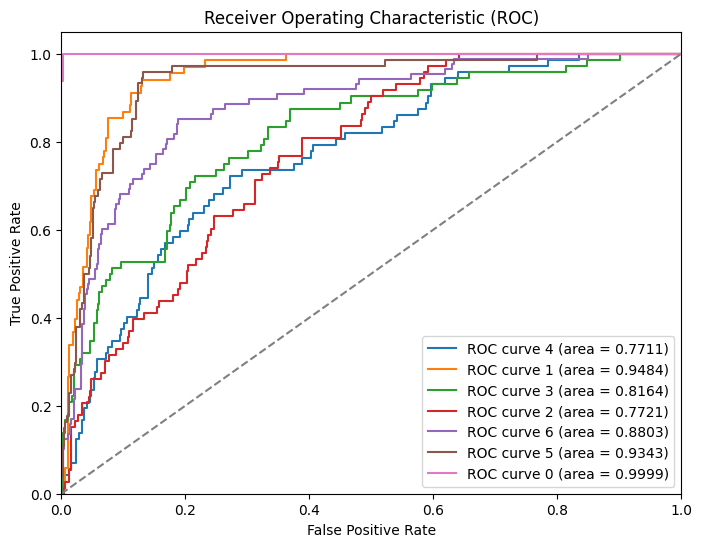

In [215]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Supongamos que 'fpr' y 'tpr' son diccionarios que contienen las tasas de falsos positivos y verdaderos positivos, respectivamente
# roc_auc es un diccionario que contiene el área bajo la curva (AUC) para cada clase

# Graficar la curva ROC para cada clase
plt.figure(figsize=(8, 6))
for i in range(len(y_test['NObeyesdad'].unique())):
    plt.plot(fpr[i], tpr[i], label='ROC curve {} (area = %0.4f)'.format(y_test['NObeyesdad'].unique()[i]) % roc_auc[i])

# Configurar etiquetas y título del gráfico
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# Arbol de decisión

Se aplicó el modelo con Arbol de decisión utilizando las funciones Pipeline y GridSearchCV, con la finalidad de crear diversos modelos y elegir aquel que logre el mejor desempeño en cuanto a precisión (accuracy).

In [216]:
arbol = DecisionTreeClassifier(random_state=30)
modelo_arbol = Pipeline(
    [
    ("preprocesamiento", preprocessing),
    ("Classifier", arbol),  
    ]
)

In [217]:
k_fold = StratifiedKFold(5, shuffle=True, random_state=30)
param_grid = {"Classifier__criterion": ['entropy', 'gini','log_loss'],
              "Classifier__max_depth": range(2, 6),
              "Classifier__min_samples_leaf": range(2, 10)}

best_tree = GridSearchCV(modelo_arbol, param_grid, cv=k_fold, scoring='accuracy', n_jobs=-1)
best_tree.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=30, shuffle=True),
             estimator=Pipeline(steps=[('preprocesamiento',
                                        ColumnTransformer(transformers=[('codificacion '
                                                                         'de '
                                                                         'categoricas',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Gender',
                                                                          'family_history_with_overweight',
                                                                          'FAVC',
                                                                          'SMOKE',
                                                                          'SCC',
                                                                          'CAEC',
                                                                          'CALC',
                                                                          'MTRANS']),
                                                                        ('Transformación '
                                                                         'de '
                                                                         'numéricas',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'FCVC',
                                                                          'NCP',
                                                                          'CH2O',
                                                                          'FAF',
                                                                          'TUE'])],
                                                          verbose_feature_names_out=False)),
                                       ('Classifier',
                                        DecisionTreeClassifier(random_state=30))]),
             n_jobs=-1,
             param_grid={'Classifier__criterion': ['entropy', 'gini',
                                                   'log_loss'],
                         'Classifier__max_depth': range(2, 6),
                         'Classifier__min_samples_leaf': range(2, 10)},
             scoring='accuracy')

Dentro de los diferentes modelos de árbol de decisión creados, se eligio el mejor modelo con un accurency de 0.6307 con datos de testeo y de 0.6343 con datos de entrenamiento. Además, presentó un área bajo la curva (AUC) de 0.8982, bajo las siguientes especificaciones:

- clasificador__criterion: En este caso, se utiliza el índice de Gini. El índice de Gini mide la impureza de un conjunto de datos, y el algoritmo de árbol de decisión buscará las divisiones que minimicen esta impureza.

- clasificador__max_depth: Este parámetro controla la profundidad máxima del árbol de decisión. Se ha establecido en 5, lo que significa que el árbol se construirá con un máximo de 5 niveles de profundidad desde el nodo raíz hasta las hojas.

- clasificador__min_samples_leaf: Este parámetro establece el número mínimo de muestras requeridas en una hoja del árbol. Lo que significa que una hoja del árbol debe contener al menos 8 muestras.

In [218]:
best_tree.best_params_

{'Classifier__criterion': 'gini',
 'Classifier__max_depth': 5,
 'Classifier__min_samples_leaf': 8}

En total, se estima que del total de individuos mal clasificados (195), 66 son falsos negativos y 129 son falsos positivos, lo que resulta en una sensibilidad del 0.6560 y una precisión del 0.6307

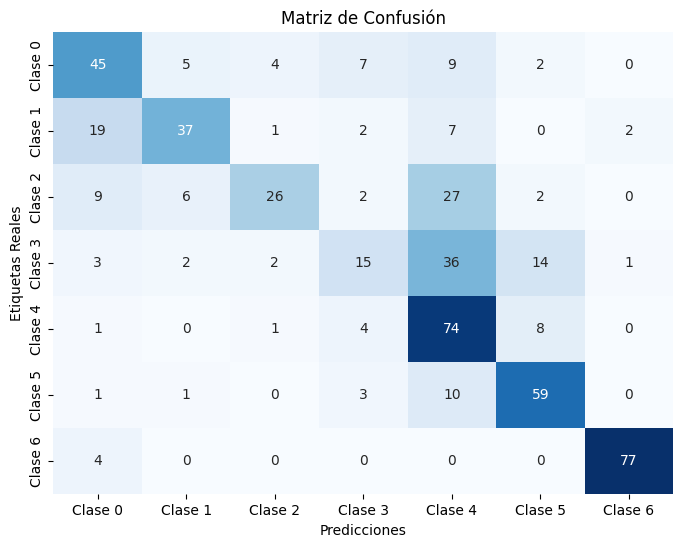

In [219]:
from sklearn.metrics import confusion_matrix

y_test1= pd.DataFrame(y_test)
y_predtree = best_tree.predict(X_test)
cm = confusion_matrix(y_test1, y_predtree)
# Configuración de la matriz de confusión usando seaborn

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Clase {}'.format(i) for i in range(cm.shape[0])],
            yticklabels=['Clase {}'.format(i) for i in range(cm.shape[0])])

plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Reales')
plt.show()

plt.show()

In [220]:
print("Accuracy con datos de entrenamiento",round(best_tree.best_score_,4))
print("Accuracy con datos nuevos", round(best_tree.score(X_test,y_test),4))
print("Sensibilidad", round(recall_score(y_test, y_predtree, average='weighted'),4))
print("Precisión", round(precision_score(y_test, y_predtree, average='weighted'),4))

Accuracy con datos de entrenamiento 0.6343
Accuracy con datos nuevos 0.6307
Sensibilidad 0.6307
Precisión 0.656


In [221]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_predtree))

              precision    recall  f1-score   support

           0       0.55      0.62      0.58        72
           1       0.73      0.54      0.62        68
           2       0.76      0.36      0.49        72
           3       0.45      0.21      0.28        73
           4       0.45      0.84      0.59        88
           5       0.69      0.80      0.74        74
           6       0.96      0.95      0.96        81

    accuracy                           0.63       528
   macro avg       0.66      0.62      0.61       528
weighted avg       0.66      0.63      0.61       528



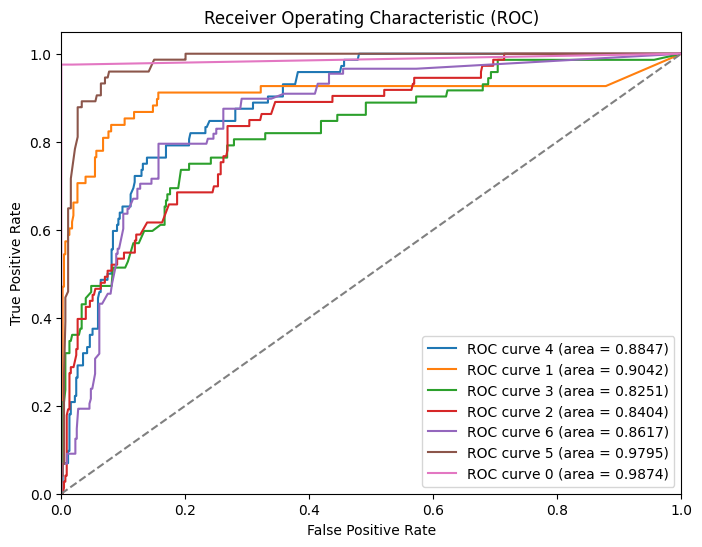

In [222]:
# Inicializar clasificador
classifier = OneVsRestClassifier(best_tree)

# Entrenar clasificador
classifier.fit(X_train, y_train)

# Obtener las probabilidades de clase para cada instancia en el conjunto de prueba
y_score = classifier.predict_proba(X_test)
# Calcular el AUC con enfoque 'weighted' para problemas multiclase
auc_weightedtree = roc_auc_score(y_test, y_score, average='weighted', multi_class='ovr')

# Calcular la curva ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(y_test['NObeyesdad'].unique())):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Supongamos que 'fpr' y 'tpr' son diccionarios que contienen las tasas de falsos positivos y verdaderos positivos, respectivamente
# roc_auc es un diccionario que contiene el área bajo la curva (AUC) para cada clase

# Graficar la curva ROC para cada clase
plt.figure(figsize=(8, 6))
for i in range(len(y_test['NObeyesdad'].unique())):
    plt.plot(fpr[i], tpr[i], label='ROC curve {} (area = %0.4f)'.format(y_test['NObeyesdad'].unique()[i]) % roc_auc[i])

# Configurar etiquetas y título del gráfico
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [223]:
print(auc_weightedtree)

0.8981651981689409


# Random Forest


Se utilizó la combinación de las funciones Pipeline y GridSearchCV para implementar Random Forest. El propósito fue generar diversos modelos logísticos y identificar aquel que lograra el mejor rendimiento en términos de precisión (accuracy).

In [224]:
# Random Forest
modelo=RandomForestClassifier(random_state=30)
modelo_rf = Pipeline(
    [
    ("preprocesamiento", preprocessing),
    ("clasificador", modelo),
    ]
)


In [225]:
k_fold = StratifiedKFold(5, shuffle=True, random_state=30)
param_grid = {'clasificador__criterion': ['entropy', 'log_loss', 'gini'],
              'clasificador__max_depth': range(3, 10),
              'clasificador__min_samples_leaf': range(2, 10)}
best_rf = GridSearchCV(modelo_rf, param_grid, scoring='accuracy', n_jobs=-1)
best_rf.fit(X_train, y_train)

c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(estimator=Pipeline(steps=[('preprocesamiento',
                                        ColumnTransformer(transformers=[('codificacion '
                                                                         'de '
                                                                         'categoricas',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Gender',
                                                                          'family_history_with_overweight',
                                                                          'FAVC',
                                                                          'SMOKE',
                                                                          'SCC',
                                                                          'CAEC',
                                                                          'CALC',
                                                                          'MTRANS']),
                                                                        ('Transformación '
                                                                         'de '
                                                                         'numéricas',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'FCVC',
                                                                          'NCP',
                                                                          'CH2O',
                                                                          'FAF',
                                                                          'TUE'])],
                                                          verbose_feature_names_out=False)),
                                       ('clasificador',
                                        RandomForestClassifier(random_state=30))]),
             n_jobs=-1,
             param_grid={'clasificador__criterion': ['entropy', 'log_loss',
                                                     'gini'],
                         'clasificador__max_depth': range(3, 10),
                         'clasificador__min_samples_leaf': range(2, 10)},
             scoring='accuracy')

Dentro de los diferentes modelos Random Forest creados, se eligio el mejor modelo con un accurency de 0.8182 con datos de testeo y de 0.8016 con datos de entrenamiento. Además, presentó un área bajo la curva (AUC) de 0.9734, bajo las siguientes especificaciones:

- clasificador__criterion: Este parámetro indica el criterio utilizado para medir la calidad de una división en el árbol de decisión. En este caso, se ha configurado con 'entropy'. La ganancia de información mide la reducción de la incertidumbre y se utiliza para seleccionar la mejor característica para dividir los nodos del árbol.

- clasificador__max_depth: Este parámetro controla la profundidad máxima del árbol de decisión. En tu configuración, se ha establecido en 9, lo que significa que el árbol se construirá con un máximo de 9 niveles de profundidad desde el nodo raíz hasta las hojas.

- clasificador__min_samples_leaf: Este parámetro establece el número mínimo de muestras requeridas en una hoja del árbol. Lo que significa que una hoja del árbol debe contener al menos 2 muestras.

In [226]:
best_rf.best_params_

{'clasificador__criterion': 'entropy',
 'clasificador__max_depth': 9,
 'clasificador__min_samples_leaf': 2}

En total, se estima que del total de individuos mal clasificados (114), 36 son falsos negativos y 60 son falsos positivos, lo que resulta en una sensibilidad del 0.8182 y una precisión del 0.8219.

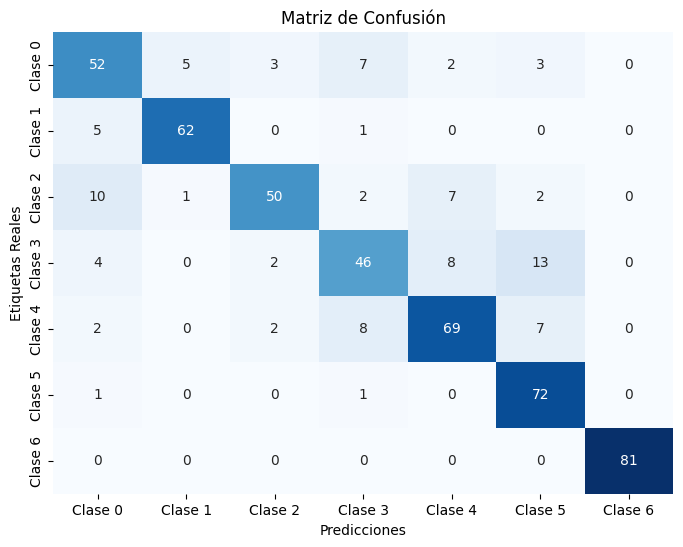

In [227]:
y_test1= pd.DataFrame(y_test)
y_predrf = best_rf.predict(X_test)
cm = confusion_matrix(y_test1, y_predrf)
# Configuración de la matriz de confusión usando seaborn

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Clase {}'.format(i) for i in range(cm.shape[0])],
            yticklabels=['Clase {}'.format(i) for i in range(cm.shape[0])])

plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Reales')
plt.show()

plt.show()

In [228]:
print("Accuracy con datos de entrenamiento",round(best_rf.best_score_,4))
print("Accuracy con datos nuevos", round(best_rf.score(X_test,y_test),4))
print("Sensibilidad", round(recall_score(y_test, y_predrf, average='weighted'),4))
print("Precisión", round(precision_score(y_test, y_predrf, average='weighted'),4))

Accuracy con datos de entrenamiento 0.8016
Accuracy con datos nuevos 0.8182
Sensibilidad 0.8182
Precisión 0.8219


In [229]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_predrf))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71        72
           1       0.91      0.91      0.91        68
           2       0.88      0.69      0.78        72
           3       0.71      0.63      0.67        73
           4       0.80      0.78      0.79        88
           5       0.74      0.97      0.84        74
           6       1.00      1.00      1.00        81

    accuracy                           0.82       528
   macro avg       0.82      0.82      0.81       528
weighted avg       0.82      0.82      0.82       528



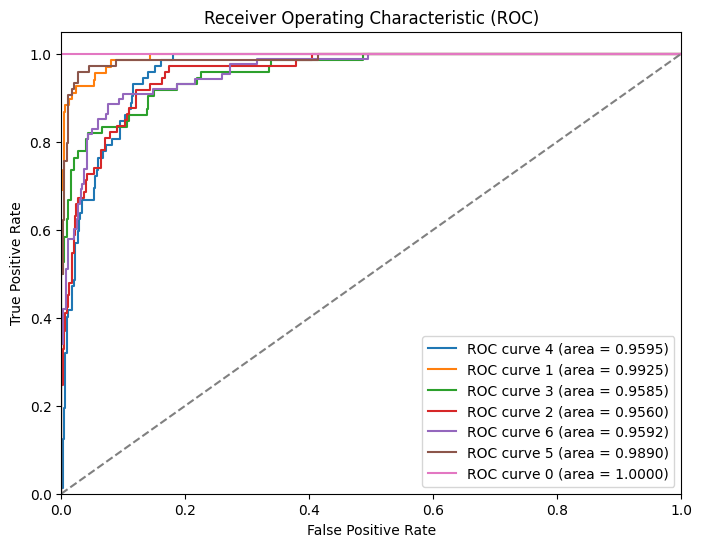

In [230]:
# Inicializar clasificador
classifier = OneVsRestClassifier(best_rf)

# Entrenar clasificador
classifier.fit(X_train, y_train)

# Obtener las probabilidades de clase para cada instancia en el conjunto de prueba
y_score = classifier.predict_proba(X_test)
# Calcular el AUC con enfoque 'weighted' para problemas multiclase
auc_weightedrf = roc_auc_score(y_test, y_score, average='weighted', multi_class='ovr')

# Calcular la curva ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(y_test['NObeyesdad'].unique())):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Supongamos que 'fpr' y 'tpr' son diccionarios que contienen las tasas de falsos positivos y verdaderos positivos, respectivamente
# roc_auc es un diccionario que contiene el área bajo la curva (AUC) para cada clase

# Graficar la curva ROC para cada clase
plt.figure(figsize=(8, 6))
for i in range(len(y_test['NObeyesdad'].unique())):
    plt.plot(fpr[i], tpr[i], label='ROC curve {} (area = %0.4f)'.format(y_test['NObeyesdad'].unique()[i]) % roc_auc[i])

# Configurar etiquetas y título del gráfico
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


# Naive Bayes

Se utilizó la combinación de las funciones Pipeline y GridSearchCV para implementar Naive Bayes. El propósito fue generar diversos modelos logísticos y identificar aquel que lograra el mejor rendimiento en términos de precisión (accuracy).

In [231]:
gnb=GaussianNB()
modelo_GNB = Pipeline(
    [
    ("preprocesamiento", preprocessing),
    ("Classifier", gnb),  
    ]
)

k_fold = StratifiedKFold(5, shuffle=True, random_state=54)
param_grid = {}
#param_grid ={}
best_GNB = GridSearchCV(modelo_GNB, param_grid, scoring='accuracy', n_jobs=-1)
best_GNB.fit(X_train, y_train)


c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=Pipeline(steps=[('preprocesamiento',
                                        ColumnTransformer(transformers=[('codificacion '
                                                                         'de '
                                                                         'categoricas',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Gender',
                                                                          'family_history_with_overweight',
                                                                          'FAVC',
                                                                          'SMOKE',
                                                                          'SCC',
                                                                          'CAEC',
                                                                          'CALC',
                                                                          'MTRANS']),
                                                                        ('Transformación '
                                                                         'de '
                                                                         'numéricas',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'FCVC',
                                                                          'NCP',
                                                                          'CH2O',
                                                                          'FAF',
                                                                          'TUE'])],
                                                          verbose_feature_names_out=False)),
                                       ('Classifier', GaussianNB())]),
             n_jobs=-1, param_grid={}, scoring='accuracy')

A diferencia de otros modelos, El naive bayes no requiere de hiperparametros para su realización. Sin embargo, mediante la grilla se corrieron varios modelos y al final se escogío el modelo con un accurency de 0.4773 con datos de testeo y de 0.4409 con datos de entrenamiento. Además, presentó un área bajo la curva (AUC) de 0.8157.

En total, se estima que del total de individuos mal clasificados (375), 106 son falsos negativos y 269 son falsos positivos, lo que resulta en una sensibilidad del 0.4773 y una precisión del 0.5891.

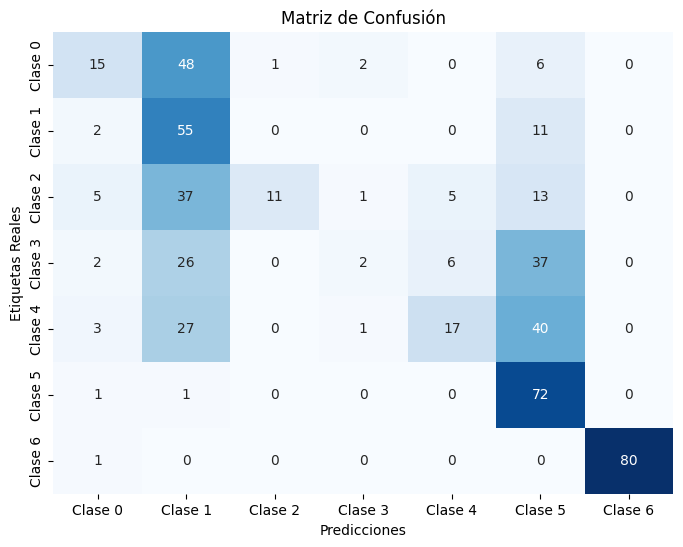

In [232]:
y_test1= pd.DataFrame(y_test)
y_predGNB = best_GNB.predict(X_test)
cm = confusion_matrix(y_test1, y_predGNB)
# Configuración de la matriz de confusión usando seaborn

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Clase {}'.format(i) for i in range(cm.shape[0])],
            yticklabels=['Clase {}'.format(i) for i in range(cm.shape[0])])

plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Reales')
plt.show()

plt.show()

In [233]:
print("Accuracy con datos de entrenamiento",round(best_GNB.best_score_,4))
print("Accuracy con datos nuevos", round(best_GNB.score(X_test,y_test),4))
print("Sensibilidad", round(recall_score(y_test, y_predGNB, average='weighted'),4))
print("Precisión", round(precision_score(y_test, y_predGNB, average='weighted'),4))

Accuracy con datos de entrenamiento 0.4409
Accuracy con datos nuevos 0.4773
Sensibilidad 0.4773
Precisión 0.5891


In [234]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_predGNB))

              precision    recall  f1-score   support

           0       0.52      0.21      0.30        72
           1       0.28      0.81      0.42        68
           2       0.92      0.15      0.26        72
           3       0.33      0.03      0.05        73
           4       0.61      0.19      0.29        88
           5       0.40      0.97      0.57        74
           6       1.00      0.99      0.99        81

    accuracy                           0.48       528
   macro avg       0.58      0.48      0.41       528
weighted avg       0.59      0.48      0.42       528



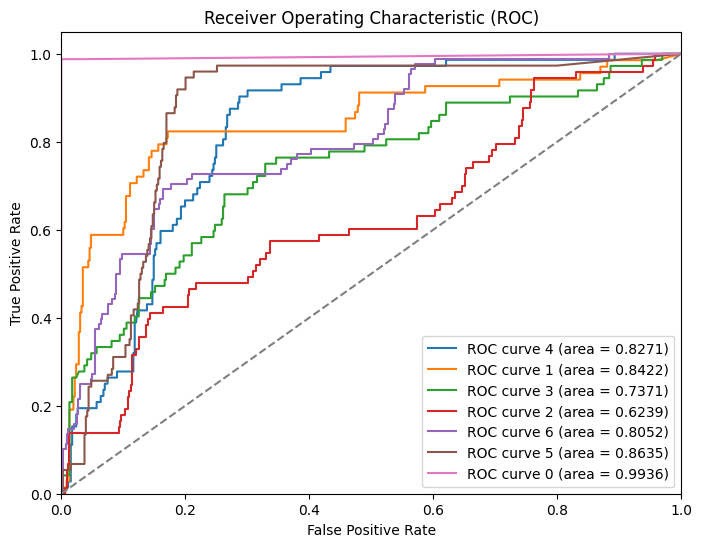

In [235]:
# Inicializar clasificador
classifier = OneVsRestClassifier(best_GNB)

# Entrenar clasificador
classifier.fit(X_train, y_train)

# Obtener las probabilidades de clase para cada instancia en el conjunto de prueba
y_score = classifier.predict_proba(X_test)
# Calcular el AUC con enfoque 'weighted' para problemas multiclase
auc_weightedGNB = roc_auc_score(y_test, y_score, average='weighted', multi_class='ovr')

# Calcular la curva ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(y_test['NObeyesdad'].unique())):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Supongamos que 'fpr' y 'tpr' son diccionarios que contienen las tasas de falsos positivos y verdaderos positivos, respectivamente
# roc_auc es un diccionario que contiene el área bajo la curva (AUC) para cada clase

# Graficar la curva ROC para cada clase
plt.figure(figsize=(8, 6))
for i in range(len(y_test['NObeyesdad'].unique())):
    plt.plot(fpr[i], tpr[i], label='ROC curve {} (area = %0.4f)'.format(y_test['NObeyesdad'].unique()[i]) % roc_auc[i])

# Configurar etiquetas y título del gráfico
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Redes Neuronales

Se utilizó la combinación de las funciones Pipeline y GridSearchCV para implementar Redes Neuronales. El propósito fue generar diversos modelos de Redes Neuronales y identificar aquel que lograra el mejor rendimiento en términos de precisión (accuracy).

In [236]:
red_neuronal = MLPClassifier(random_state=30)
rn_mlp = Pipeline(
    [
    ("preprocessing",preprocessing),
    ("Classifier",red_neuronal)    
    ]
)

In [237]:
k_fold = StratifiedKFold(5, shuffle=True, random_state=30)
param_grid ={ "Classifier__hidden_layer_sizes":[(10,), (20,), (30,)],
             "Classifier__activation":['identity','logistic','tanh','relu'],
             "Classifier__solver":['lbfgs','sgd','adam'],
             "Classifier__alpha":[0.0001, 0.001, 0.01, 0.1],
             "Classifier__learning_rate":['constant','invscaling','adaptative']}


best_neuralnetwork = GridSearchCV(rn_mlp, param_grid, scoring='accuracy', n_jobs=-1)
best_neuralnetwork.fit(X_train, y_train)

c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
163 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\LauraCuestas\anaconda3\envs\t

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('codificacion '
                                                                         'de '
                                                                         'categoricas',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Gender',
                                                                          'family_history_with_overweight',
                                                                          'FAVC',
                                                                          'SMOKE',
                                                                          'SCC',
                                                                          'CAEC',
                                                                          'CALC',
                                                                          'MTRANS']),
                                                                        ('Transformación '
                                                                         'de '
                                                                         'numéricas',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'FCVC',
                                                                          'NCP',
                                                                          'CH2O',
                                                                          'FAF',
                                                                          'TUE'])],
                                                          verbose_f...
                                       ('Classifier',
                                        MLPClassifier(random_state=30))]),
             n_jobs=-1,
             param_grid={'Classifier__activation': ['identity', 'logistic',
                                                    'tanh', 'relu'],
                         'Classifier__alpha': [0.0001, 0.001, 0.01, 0.1],
                         'Classifier__hidden_layer_sizes': [(10,), (20,),
                                                            (30,)],
                         'Classifier__learning_rate': ['constant', 'invscaling',
                                                       'adaptative'],
                         'Classifier__solver': ['lbfgs', 'sgd', 'adam']},
             scoring='accuracy')

Apartir de la realización de diferentes modelos de redes neuronales, se eligio el mejor modelo con un accurency de 0.8182 con datos de testeo y de 0.7334 con datos de entrenamiento. Además, presentó un área bajo la curva (AUC) de 0.957, bajo las siguientes especificaciones:

- Classifier__activation: 'relu'
En este caso, se ha seleccionado en este caso 'relu' la cual se refiere a la función de activación Rectified Linear Unit (ReLU) comúnmente utilizada en redes neuronales.

- Classifier__alpha: 0.1
La regularización ayuda a prevenir el sobreajuste al penalizar pesos grandes. Un valor de alpha más alto implica una regularización más fuerte y el implementado en este modelo es relativamente alto.

- Classifier__hidden_layer_sizes: (30,)
Indica la arquitectura de la red neuronal, es decir, el número de neuronas en cada capa oculta. En este caso, hay una única capa oculta con 30 neuronas.

- Classifier__learning_rate: 'constant'
Este parámetro determina la estrategia de ajuste de la tasa de aprendizaje durante el entrenamiento. 'constant' indica que la tasa de aprendizaje se mantendrá constante durante todo el proceso de entrenamiento. 

- Classifier__solver: 'lbfgs'
Se ha seleccionado 'lbfgs', que es un algoritmo de optimización de segundo orden bien adaptado para problemas de optimización convexa.

In [238]:
best_neuralnetwork.best_params_

{'Classifier__activation': 'relu',
 'Classifier__alpha': 0.1,
 'Classifier__hidden_layer_sizes': (30,),
 'Classifier__learning_rate': 'constant',
 'Classifier__solver': 'lbfgs'}


En total, se estima que del total de individuos mal clasificados (134), 54 son falsos negativos y 80 son falsos positivos, lo que resulta en una sensibilidad del 0.7462 y una precisión del 0.7439.

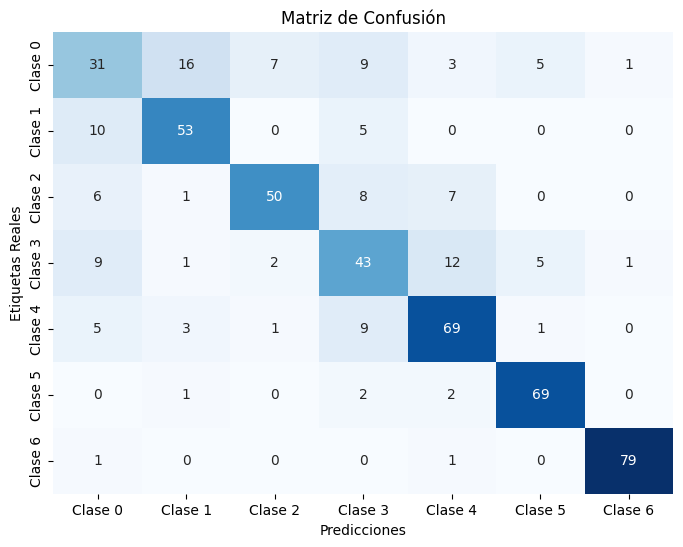

In [239]:
y_test1= pd.DataFrame(y_test)
y_predRED = best_neuralnetwork.predict(X_test)
cm = confusion_matrix(y_test1, y_predRED)
# Configuración de la matriz de confusión usando seaborn

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Clase {}'.format(i) for i in range(cm.shape[0])],
            yticklabels=['Clase {}'.format(i) for i in range(cm.shape[0])])

plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Reales')
plt.show()

plt.show()

In [240]:
print("Accuracy con datos de entrenamiento",round(best_neuralnetwork.best_score_,4))
print("Accuracy con datos nuevos", round(best_neuralnetwork.score(X_test,y_test),4))
print("Sensibilidad", round(recall_score(y_test, y_predRED, average='weighted'),4))
print("Precisión", round(precision_score(y_test, y_predRED, average='weighted'),4))

Accuracy con datos de entrenamiento 0.7334
Accuracy con datos nuevos 0.7462
Sensibilidad 0.7462
Precisión 0.7439


In [241]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_predRED))

              precision    recall  f1-score   support

           0       0.50      0.43      0.46        72
           1       0.71      0.78      0.74        68
           2       0.83      0.69      0.76        72
           3       0.57      0.59      0.58        73
           4       0.73      0.78      0.76        88
           5       0.86      0.93      0.90        74
           6       0.98      0.98      0.98        81

    accuracy                           0.75       528
   macro avg       0.74      0.74      0.74       528
weighted avg       0.74      0.75      0.74       528



c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
143 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\LauraCuestas\anaconda3\envs\t

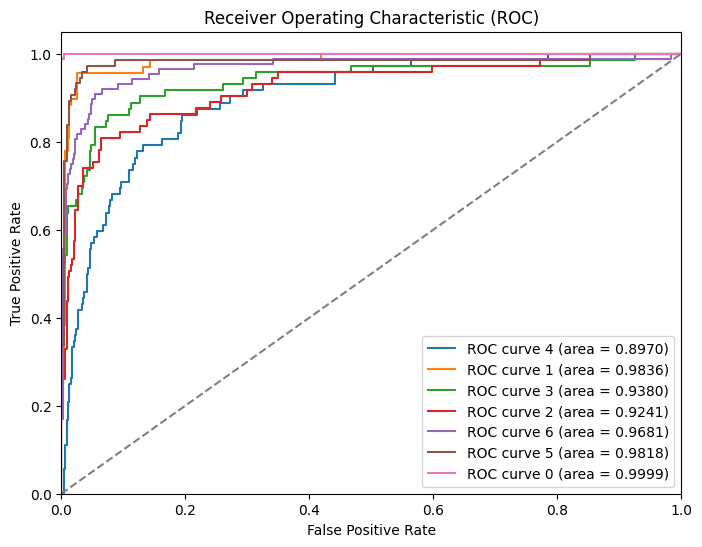

In [242]:
# Inicializar clasificador
classifier = OneVsRestClassifier(best_neuralnetwork)

# Entrenar clasificador
classifier.fit(X_train, y_train)

# Obtener las probabilidades de clase para cada instancia en el conjunto de prueba
y_score = classifier.predict_proba(X_test)
# Calcular el AUC con enfoque 'weighted' para problemas multiclase
auc_weightedRED = roc_auc_score(y_test, y_score, average='weighted', multi_class='ovr')

# Calcular la curva ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(y_test['NObeyesdad'].unique())):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Supongamos que 'fpr' y 'tpr' son diccionarios que contienen las tasas de falsos positivos y verdaderos positivos, respectivamente
# roc_auc es un diccionario que contiene el área bajo la curva (AUC) para cada clase

# Graficar la curva ROC para cada clase
plt.figure(figsize=(8, 6))
for i in range(len(y_test['NObeyesdad'].unique())):
    plt.plot(fpr[i], tpr[i], label='ROC curve {} (area = %0.4f)'.format(y_test['NObeyesdad'].unique()[i]) % roc_auc[i])

# Configurar etiquetas y título del gráfico
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Al contrastar todos los modelos previamente mencionados, destaca que el Random Forest exhibe una precisión superior en la predicción de los niveles de obesidad (Precisión: 0.8219), y además, una exactitud global mayor que la de los demás modelos (Accuracy: 0.8182). Es relevante señalar que, el Random Forest también presenta uno de los AUC más altos en comparación con los otros modelos. Esto sugiere una capacidad de clasificación y discriminación más robusta en cuanto a los diferentes estados de la variable obesidad.

In [243]:
data = {'Modelo':['Logistico', 'Arbol de decisión', 'Random Forest', 'Naive Bayes', 'Red Neuronal'],
        'Precisión':[round(precision_score(y_test, y_predlog, average='weighted'),ndigits=4), round(precision_score(y_test, y_predtree, average='weighted'),ndigits=4), round(precision_score(y_test, y_predrf, average='weighted'),ndigits=4), round(precision_score(y_test, y_predGNB, average='weighted'),ndigits=4), round(precision_score(y_test, y_predRED, average='weighted'),ndigits=4)],
        'Sensibilidad':[round(recall_score(y_test, y_predlog, average='weighted'),ndigits=4), round(recall_score(y_test, y_predtree, average='weighted'),ndigits=4), round(recall_score(y_test, y_predrf, average='weighted'),ndigits=4), round(recall_score(y_test, y_predGNB, average='weighted'),ndigits=4), round(recall_score(y_test, y_predRED, average='weighted'),ndigits=4)],
        'F1':[round(f1_score(y_test, y_predlog, average='weighted'),ndigits=4), round(f1_score(y_test, y_predtree, average='weighted'),ndigits=4), round(f1_score(y_test, y_predrf, average='weighted'),ndigits=4), round(f1_score(y_test, y_predGNB, average='weighted'),ndigits=4), round(f1_score(y_test, y_predRED, average='weighted'),ndigits=4)],
        'AUC':[round(auc_weighted,ndigits=4), round(auc_weightedtree,ndigits=4), round(auc_weightedrf,ndigits=4), round(auc_weightedGNB,ndigits=4), round(auc_weightedRED,ndigits=4)],
        'Accuracy':[round(best_log.score(X_test,y_test),4), round(best_tree.score(X_test,y_test),4), round(best_rf.score(X_test,y_test),4), round(best_GNB.score(X_test,y_test),4), round(best_neuralnetwork.score(X_test,y_test),4)]}
Modelo=['Logistico', 'Arbol de decisión', 'Random Forest', 'Naive Bayes', 'Red Neuronal']
data = pd.DataFrame(data, index=None)


print(tabulate(data.sort_values(by='Accuracy', ascending=False), headers='keys', tablefmt='pretty', showindex=False))

+-------------------+-----------+--------------+--------+--------+----------+
|      Modelo       | Precisión | Sensibilidad |   F1   |  AUC   | Accuracy |
+-------------------+-----------+--------------+--------+--------+----------+
|   Random Forest   |  0.8219   |    0.8182    | 0.8161 | 0.9734 |  0.8182  |
|   Red Neuronal    |  0.7439   |    0.7462    | 0.7432 | 0.957  |  0.7462  |
|     Logistico     |  0.6323   |    0.642     | 0.6272 | 0.8764 |  0.642   |
| Arbol de decisión |   0.656   |    0.6307    | 0.6148 | 0.8982 |  0.6307  |
|    Naive Bayes    |  0.5891   |    0.4773    | 0.4184 | 0.8157 |  0.4773  |
+-------------------+-----------+--------------+--------+--------+----------+


# Interpretación del Mejor modelo: Random Forest

En el modelo random forest, como se mencionó anteriormente se seleccionó el mejor modelo con los siguientes hiperparametros:

- clasificador__criterion: 'entropy'
- clasificador__max_depth: 9 
- clasificador__min_samples_leaf: 2 

In [244]:
def custom_transformer(X):
    # Definir las columnas categóricas y numéricas según tu conjunto de datos
    categorical= ["Gender","family_history_with_overweight", "FAVC","SMOKE", "SCC","CAEC","CALC",'MTRANS']
    numerical_columns = ["Age", "FCVC", "NCP", "CH2O", "FAF","TUE"]

    # Crear un ColumnTransformer con las transformaciones deseadas
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_columns),  # Estandarizar variables numéricas
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)  # Codificar variables categóricas
        ],
    )

    # Devolver el conjunto de datos transformado
    return preprocessor.fit_transform(X)

In [252]:
X_train2 = custom_transformer(X_train)
X_train2 = pd.DataFrame(X_train2)

In [246]:
RandomForest = RandomForestClassifier(criterion='entropy',
        max_depth=9,
        min_samples_leaf= 2,
        random_state=30)

RandomForest.fit(X_train2, y_train)
print(best_rf.best_score_, best_rf.score(X_test,y_test))

c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8016411771752587 0.8181818181818182


In [253]:
primer_paso=modelo_rf['preprocesamiento']
primer_paso.fit(X_train, y_train)
primer_paso.get_feature_names_out()
primer_paso.transform(X_train)
import pandas as pd
DF=pd.DataFrame(primer_paso.transform(X_train), columns=primer_paso.get_feature_names_out())

Para su análisis se tendrá en cuenta en primera instancia la importancia de características para la estimación del modelo. Como resultado, se obtuvo que las variables de genero (Gender: tanto Male como Female), su familia tiene antecedentes de sobrepeso (family_history_with_overweight: no), ¿come frecuentemente comidas altas en calorías (FACV: sí)? y ¿si usted fuma? (SMOKE: yes) son las más significativas para clasificar a las personas en los diferentes niveles de obesidad, como se muestra en la gráfica de “Importancia de características (MDI)”

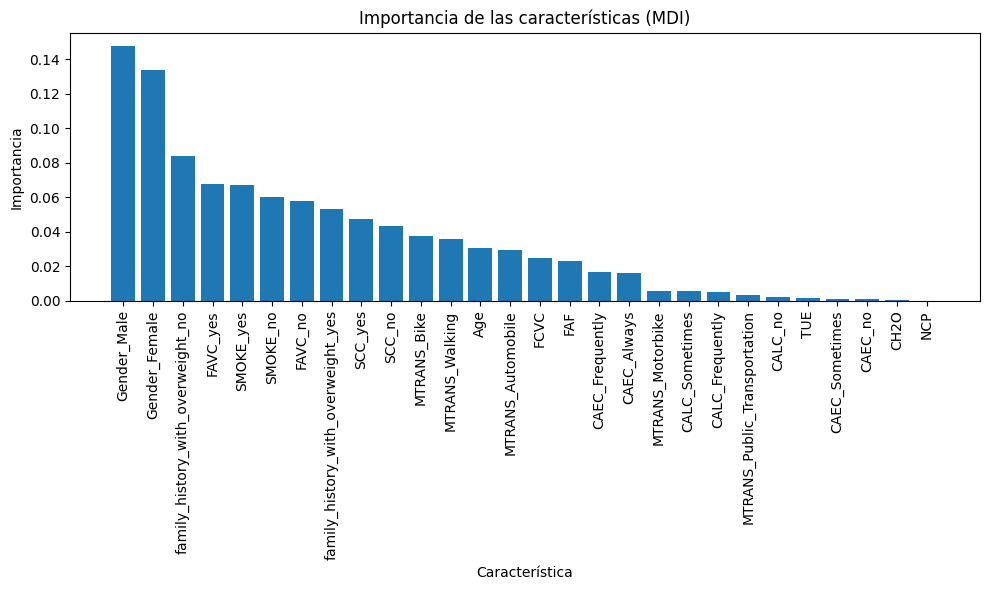

In [248]:
feature_importance = RandomForest.feature_importances_
feature_names = DF.columns
sorted_indices = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))

# Graficar la importancia de las características
plt.bar(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.xticks(range(len(feature_importance)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel('Característica')
plt.ylabel('Importancia')
plt.title('Importancia de las características (MDI)')
plt.tight_layout()

# Mostrar la gráfica
plt.show()


Después de analizar el error y los puntajes del modelo, se buscó determinar el número ideal de árboles para maximizar la precisión del modelo de Random Forest en la clasificación de los niveles de obesidad en personas.

- Se trazó la gráfica "Evolución del puntaje de entrenamiento y Out-of-Bag", que compara el rendimiento obtenido con los datos utilizados por los árboles de Random Forest frente a la información que no se empleó en la estimación del modelo. Se observó que tanto en los datos de entrenamiento como en los de Out-of-Bag, el número óptimo de árboles rondaba los 140. Sin embargo, se destacó que a partir del veinteavo árbol, el puntaje se estabilizó, lo que sugiere que 20 árboles es el número óptimo para lograr buenos resultados.
- Por último, se implementó la gráfica "Evolución del cv error vs error del modelo" el cual compara la evolución del error obtenido con los datos utilizados por los árboles de Random Forest frente al error que se obtiene cuando se evalúa el modelo utilizando k-fold cross-validation. En k-fold cross-validation, los datos se dividen en k partes (folds), y el modelo se entrena k veces, utilizando cada fold como conjunto de prueba una vez y los k-1 folds restantes como conjunto de entrenamiento. Esto proporciona una estimación más robusta del rendimiento del modelo que el simple error de entrenamiento.Se observó que tanto en los datos de entrenamiento como en los de k-fold cross-validation, el número óptimo de árboles rondaba los 140. Sin embargo, se destacó que a partir del veinteavo árbol, el error se estabilizó, lo que sugiere que 20 árboles es el número óptimo para lograr buenos resultados.


c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

Valor óptimo de n_estimators: 141


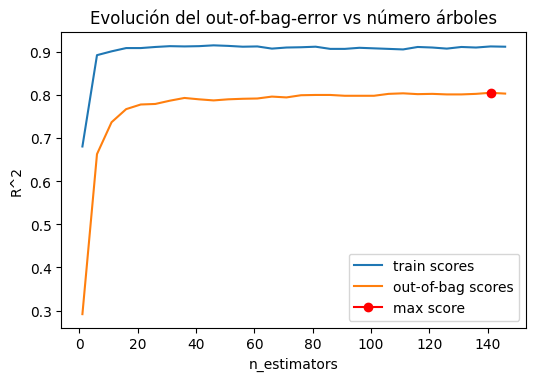

In [249]:
from sklearn.ensemble import RandomForestRegressor
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    modelo = RandomForestClassifier(
                n_estimators = n_estimators,
                oob_score    = True,
                criterion='entropy',
                max_depth=9,
                min_samples_leaf= 2,
                random_state=30)
    modelo.fit(DF, y_train)
    train_scores.append(modelo.score(DF, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag score vs número árboles")
plt.legend()
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")

c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees we

Valor óptimo de n_estimators: 136


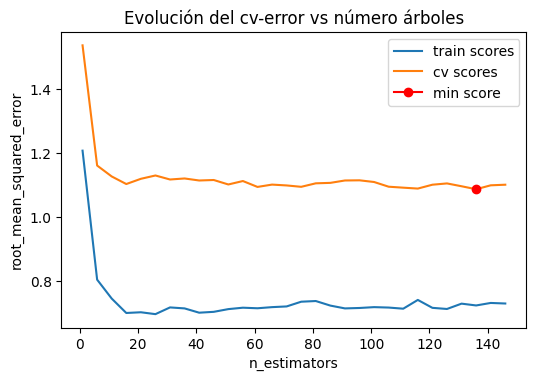

In [250]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    
    modelo = RandomForestClassifier(
                n_estimators = n_estimators,
                oob_score    = True,
                criterion='entropy',
                max_depth=9,
                min_samples_leaf= 2,
                random_state=30)
    
    # Error de train
    modelo.fit(X_train2, y_train)
    predicciones = modelo.predict(X = X_train2)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train2,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend()
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

In [251]:
from sklearn.metrics import accuracy_score, log_loss
# Inicializar listas para almacenar precisión y pérdidas por época
accuracies = []
losses = []

# Bucle de entrenamiento por épocas
for epoch in range(1, 50):
    # Entrenar el modelo utilizando fit en lugar de partial_fit
    red_neuronal = MLPClassifier(activation='logistic',
        alpha=0.1,
        hidden_layer_sizes=(30,),
        learning_rate='invscaling',
        solver='lbfgs', verbose=True,
        random_state=30, max_iter=epoch)
    red_neuronal.fit(X_train2, y_train)

    # Calcular la precisión en el conjunto de entrenamiento
    y_pred = red_neuronal.predict(X_train2)
    accuracy = accuracy_score(y_train, y_pred)
    accuracies.append(accuracy)

    # Calcular la pérdida logarítmica (log loss) en el conjunto de entrenamiento
    y_prob = red_neuronal.predict_proba(X_train2)
    loss = log_loss(y_train, y_prob)
    losses.append(loss)



c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\LauraCuestas\anaconda3\envs\tensor_310\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for e